Author: Nik Alleyne <br>
Author Blog: **https://www.securitynik.com** <br>
Author GitHub: **github.com/securitynik** <br>

Author Books: [  <br>

                "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/", 
                
                "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/" 
            ] 

### Why this series?
When teaching the SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals 
**https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/** I am always asked,
"Will you be sharing your demo notebooks?" or "Can we get a copy of your demo notebooks?" or ... well you get the point.
My answer is always no. Not that I do not want to share, (sharing is caring :-D) , but the demo notebooks 
by themselves, would not make sense or add real value. Hence, this series! 

This is my supplemental work, similar to what I would do in the demos but with a lot more details and references.


## 21. Beginning Regularization - Early Stopping, Dropout, L2 (Ridge), L1 (Lasso)

### The series includes the following: <br>
01 - Beginning Numpy <br>
02 - Beginning Tensorflow  <br>
03 - Beginning PyTorch <br>
04 - Beginning Pandas <br>
05 - Beginning Matplotlib <br>
06 - Beginning Data Scaling <br>
07 - Beginning Principal Component Analysis (PCA) <br>
08 - Beginning Machine Learning Anomaly Detection - Isolation Forest and Local Outlier Factor <br>
09 - Beginning Unsupervised Machine Learning - Clustering - K-means and DBSCAN <br>
10 - Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics <br>
11 - Beginning Linear Regression - Machine Learning <br>
12 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, Tensorflow <br>
13 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch <br>
14 - Beginning Deep Learning - Linear Regression, Tensorflow <br>
15 - Beginning Deep Learning - Linear Regression, PyTorch <br>
16 - Beginning Deep Learning - Classification, Tensorflow <br>
17 - Beginning Deep Learning - Classification, Pytorch <br>
18 - Beginning Deep Learning - Classification - regression - MIMO - Functional API Tensorflow <br> 
19 - Beginning Deep Learning - Convolution Networks - Tensorflow <br>
20 - Beginning Deep Learning - Convolution Networks - PyTorch <br>
21 - Beginning Regularization - Early Stopping, Dropout, L2 (Ridge), L1 (Lasso) <br>
22 - Beginning Model TFServing <br>

But conn.log is not the only log file within Zeek. Let's build some models for DNS and HTTP logs. <br>
I choose unsupervised, because there are no labels coming with these data. <br>

23 - Continuing Anomaly Learning - Zeek DNS Log - Machine Learning <br>
24 - Continuing Unsupervised Learning - Zeek HTTP Log - Machine Learning <br>

This was a specific ask by someone in one of my class. <br>
25 - Beginning - Reading Executables and Building a Neural Network to make predictions on suspicious vs suspicious  <br><br>

With 25 notebooks in this series, it is quite possible there are things I could have or should have done differently.  <br>
If you find any thing, you think fits those criteria, drop me a line. <br>

If you find this series beneficial, I would greatly appreciate your feedback.


Regularization is used to address overfitting. Overfitting is where the model learns very well on the training data, but when it's time to make prediction, the model is terrible. More politely, the model fails to generalize. Think of a model that has 99% accuracy during training, as we saw in some of our imbalance class models. However, when provided with test or previously unseen data, the model operates under 50%. That would be a major case of overfitting.

There are a number of strategies to address overfitting. 
One can start by reducing the number of features through manual or automatic processes such as dimensionality reduction mechanisms such as PCA as was explained in the PCA notebook: 
    07 - Beginning Principal Component Analysis (PCA)

You can also also try to get more data.
Then again, if you could have gotten that data, you would have more than likely used it as part of the initial training ;-)

With regularization, we want to keep all the features but reduce the magnitude of the parameters (weights and biases)
In this case you want to penalize the cost function by adding a regularization term. There is also a regularization parameter Lambda which is also used. Lambda controls the trade off between fitting the training data and keeping the parameters small enough

By adding the regularization term to the cost function we are able to shrink all the parameters. Realistically, we want to penalize large weights as the bias is not normally regularized

Lambda is another hyperparameter that will have to be tuned.

When Lambda is 0, you are basically not using the regularization term. Thus the model will continue to overfit.
The larger your Lambda, the closer your weights need to be to 0. This also means your model will underfit
Hence the idea is to find the right value for Lambda. One that is not too large or too small. One that is just right

Regularization = Loss Function + Penalty Term

There common types of regularization.
    1.  L2 - Ridge Regression
        - Attempts to keep the weights close to 0 but not 0
        - All parameters are penalized
    2.  L1  - Least Absolute Shrinkage and Selection Operator (LASSO)
        - Penalized some features
        - It has automatic feature selection capabilities
    3.  ElasticNet
        - Combination of L1 and L2
    3.  Dropout
        - Used in deep learning

Reference: <br>
https://www.youtube.com/watch?v=u73PU6Qwl1I <br>
https://www.youtube.com/watch?v=KvtGD37Rm5I <br>
https://www.youtube.com/watch?v=iuJgyiS7BKM <br>
https://www.youtube.com/watch?v=ce4CPW8AFE4 <br>
https://www.youtube.com/watch?v=SCj3h47dKL0 <br>

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# In the notebooks on Pandas, Matplotlib and Scaling
#   04 - Beginning Pandas <br>
#   05 - Beginning Matplotlib <br>
#   06 - Beginning Data Scaling <br>
# we loaded our dataset such as
df_conn = pd.read_csv(r'df_conn_with_labels.csv', index_col=0)
df_conn

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
1,48798,0.000000,0,0,0,0,0,0,0
2,48804,0.000000,0,0,0,0,0,0,0
4,27761,0.000000,0,0,0,0,0,0,0
5,8888,0.053276,208,976,6,528,6,1296,0
6,8888,0.383646,227,692369,202,10739,117,240893,0
...,...,...,...,...,...,...,...,...,...
4430183,9200,0.000051,0,0,1,52,1,40,0
4430184,9200,0.000023,0,0,0,0,1,40,0
4430185,9200,0.000005,0,0,0,0,1,40,0
4430186,9200,0.000005,0,0,0,0,1,40,0


This file represents Zeek (formerly Bro) connection log - conn.log`. 
Zeek is a framework used for Network Security Monitoring. 
This entire series is based on using Zeek's data. 
The majority of the notebooks use the conn.log
You can learn more about Zeek here:
   
    https://zeek.org/

Alternatively, come hang out with us in the:
SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals

        https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/ OR

SEC503 SEC503: Network Monitoring and Threat Detection In-Depth

        https://www.sans.org/cyber-security-courses/network-monitoring-threat-detection/


Here are also some blog posts on using Zeek for security monitoring
Installing Zeek: 

        https://www.securitynik.com/2020/06/installing-zeek-314-on-ubuntu-2004.html

Detecting PowerShell Empire Usage: 

        https://www.securitynik.com/2022/02/powershell-empire-detection-with-zeek.html

Detecting Log4J Vulnerability Exploitation: 

        https://www.securitynik.com/2021/12/continuing-log4shell-zeek-detection.html

In [3]:
# Looking at above, we see a number of records with 0s. 
# These will add no value to our learning process
# Let's find all those records and drop them
# Reference: https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
df_conn = df_conn.drop(df_conn[(df_conn.duration == 0 ) & (df_conn.orig_bytes == 0 ) 
                               & (df_conn.resp_bytes == 0 ) & (df_conn.orig_pkts == 0 )  \
                                & (df_conn.orig_ip_bytes == 0 ) & (df_conn.resp_pkts == 0 ) \
                                    & (df_conn.resp_ip_bytes == 0 )].index)
df_conn

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
5,8888,0.053276,208,976,6,528,6,1296,0
6,8888,0.383646,227,692369,202,10739,117,240893,0
7,8888,0.054294,208,977,6,528,6,1297,0
8,8888,0.424980,227,791633,176,9387,174,367737,0
9,8888,0.272567,227,406607,171,9127,71,169939,0
...,...,...,...,...,...,...,...,...,...
4430183,9200,0.000051,0,0,1,52,1,40,0
4430184,9200,0.000023,0,0,0,0,1,40,0
4430185,9200,0.000005,0,0,0,0,1,40,0
4430186,9200,0.000005,0,0,0,0,1,40,0


In [4]:
# Extract the responder IP Bytes as the label
y_labels = df_conn.resp_ip_bytes
y_labels

5            1296
6          240893
7            1297
8          367737
9          169939
            ...  
4430183        40
4430184        40
4430185        40
4430186        40
4430187        40
Name: resp_ip_bytes, Length: 207608, dtype: int64

In [5]:
# Drop two features, labels and resp_ip_bytes
# Put the data into a numpy array
X_data = df_conn.drop(columns=['label', 'resp_ip_bytes'], inplace=False).values
X_data

array([[8.88800e+03, 5.32760e-02, 2.08000e+02, ..., 6.00000e+00,
        5.28000e+02, 6.00000e+00],
       [8.88800e+03, 3.83646e-01, 2.27000e+02, ..., 2.02000e+02,
        1.07390e+04, 1.17000e+02],
       [8.88800e+03, 5.42940e-02, 2.08000e+02, ..., 6.00000e+00,
        5.28000e+02, 6.00000e+00],
       ...,
       [9.20000e+03, 5.00000e-06, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [9.20000e+03, 5.00000e-06, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [9.20000e+03, 5.00000e-06, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00]])

In [6]:
# Get the shape fo the X_data
X_data.shape

(207608, 7)

Text(0, 0.5, 'duration')

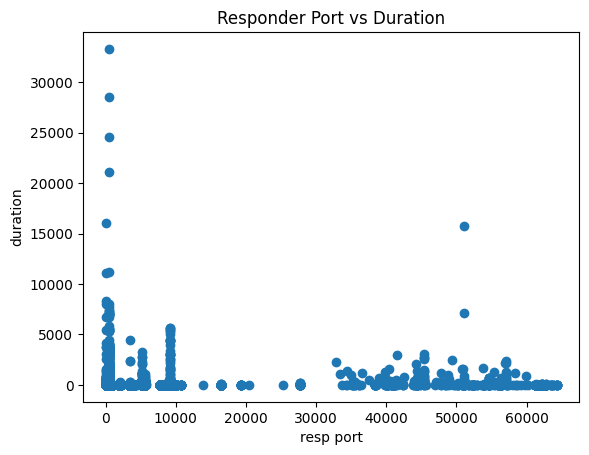

In [7]:
# Scatter plot of originator vs responder bytes
# Using matplotlib was covered in notebook:
#   05 - Beginning Matplotlib
plt.title('Responder Port vs Duration')
plt.scatter(X_data[:, 0], X_data[:, 1])
plt.xlabel('resp port')
plt.ylabel('duration')

In [8]:
# Import the library to split the data
from sklearn.model_selection import train_test_split

In [9]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels, test_size=0.2, train_size=0.8, random_state=10)
X_train.shape,  y_train.shape, X_test.shape,  y_test.shape

((166086, 7), (166086,), (41522, 7), (41522,))

In [10]:
# Prepare to scale the data
from sklearn.preprocessing import MinMaxScaler

In [11]:
# Setup the scaler
# Scaling was discussed in notebook:
#   06 - Beginning Data Scaling
min_max = MinMaxScaler(feature_range=(0,1)).fit(X_train)
X_train = min_max.transform(X_train)
X_test = min_max.transform(X_test)

In [12]:
# Import the linear regression model
from sklearn.linear_model import LinearRegression

In [13]:
# Remove scientific notations
# np.set_printoptions(suppress=True, precision=4)

# Build a linear regression model without any type of 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# Linear Regression was covered in notebooks:
#   11. Beginning Linear Regression - Machine Learning
#   14. Beginning Deep Learning, - Linear Regression, Tensorflow
#   15. Beginning Deep Learning, - Linear Regression, PyTorch
lr = LinearRegression(fit_intercept=True, n_jobs=-1).fit(X_train, y_train)

# Get the weights
lr.coef_

array([ 2.00629585e+05, -8.22793749e+06, -8.16939661e+05,  1.21688692e+06,
        2.12315659e+08, -4.97888699e+08,  7.17674612e+08])

In [14]:
# Get the bias
lr.intercept_

-794.7710600432765

In [15]:
# Compare the score on the train and test sets
#   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# The score on the the training data is very good. The closer to 1 the better off we are
# Looking at test data, we see this value is negative, meaning the model is terrible
# This is obviously a clear case of overfitting
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9847879961994693, 0.8878412502495496)

In [16]:
# Import Ridge and Lasso regularization
from sklearn.linear_model import Ridge, Lasso


In [17]:
# Leveraging Ridge regression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
# Fit the model
# Alpha controls the regularization strength and must be non negative
# When using other solvers, the scores was way terrible.
# With svd, the score between the model without regularization was not much different
ridge = Ridge(alpha=0.001, solver='svd').fit(X_train, y_train)

# Get the scores of both the train and test set scores
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.9847851556050645, 0.8889768065073369)

In [18]:
# Get the ridge coefficients
np.round(a=ridge.coef_, decimals=0)

array([ 2.02776000e+05, -8.19514200e+06, -9.40709000e+05,  1.27805800e+06,
        2.07443368e+08, -4.93085744e+08,  7.18347961e+08])

In [19]:
# Get the bias
ridge.intercept_

-660.1465566982952

In [20]:
# Leveraging Lasso
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso
# Fit the model
# Alpha controls the regularization strength and must be non negative
lasso = Lasso(alpha=.1, selection='random').fit(X_train, y_train)

# Get the scores of both the train and test set scores
# Lasso
lasso.score(X_train, y_train), lasso.score(X_test, y_test), 


(0.9847879851967936, 0.8879182058465387)

In [21]:
# Get the Lasso coefficients
lasso.coef_

array([ 2.00761921e+05, -8.22253301e+06, -8.06046704e+05,  1.21627654e+06,
        2.11941338e+08, -4.97577491e+08,  7.17769933e+08])

In [22]:
lasso.intercept_

-787.0344869213877

In [23]:
# From above, it seems neither Ridge nor Lasso helped this model addressed the overfitting.

In [24]:
# Import Tensorflow
import tensorflow as tf

In [25]:
# Build a linear regression model with Tensorflow 
model = tf.keras.Sequential(name='regression_model')
model.add(tf.keras.layers.Input(shape=(X_train.shape[1])))
# Add L2 regularization
model.add(tf.keras.layers.Dense(units=1, activation='linear', kernel_regularizer='l2'))
#model.summary()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse', metrics=['mse'])

# Fit the model
model.fit(x=X_train, y=y_train, epochs=1)

5191/5191 [==============================] - 10s 2ms/step - loss: 6133520007168.0000 - mse: 6130970918912.0000


In [26]:
# Get the model weights
# There was no noticeable difference when setting the regularization to "l1" or "l2"
model.weights

[<tf.Variable 'dense/kernel:0' shape=(7, 1) dtype=float32, numpy=
 array([[201561.16 ],
        [ 29028.03 ],
        [ 40922.535],
        [207242.83 ],
        [362990.88 ],
        [199107.23 ],
        [600808.75 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([45894.117], dtype=float32)>]

In [27]:
# Evaluate the model against the train and test data
_, mse_train = model.evaluate(X_train, y_train)
_, mse_test = model.evaluate(X_test, y_test)

mse_train, mse_test

1298/1298 [==============================] - 2s 2ms/step - loss: 2851630219264.0000 - mse: 2845445193728.0000


(6119460175872.0, 2845445193728.0)

In [28]:
# How much does the two models vary
np.var([mse_train, mse_test])

2.679793525825844e+24

Looking at the coefficients for both L2 and L1 from both the perspective of machine and deep learning,
we see that for L1 none of the coefficients are 0. 
The expectation was that some of the coefficients would be 0 for L1 and for L2, they would be close to 0
This is not the case for this dataset. 
Then again, when we look at the machine learning models, we see there is basically no overfitting for the default linear regression model.

Brining in the Boson Housing dataset, which has 105 features vs the 7 our dataset has

In [29]:
# Read the Boston Housing dataset from GitHub
df_boston = pd.read_csv('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', header=None)
df_boston

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,...,0.059749,0.208015,0.018655,0.082503,0.287234,0.025759,1.000000,0.089680,0.008042,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,...,0.146662,0.162090,0.035958,0.798551,0.882553,0.195787,0.975392,0.216382,0.048003,22.4
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,...,0.146662,0.164122,0.033286,0.798551,0.893617,0.181239,1.000000,0.202815,0.041134,20.6
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,...,0.146662,0.164122,0.017707,0.798551,0.893617,0.096414,1.000000,0.107892,0.011641,23.9
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,...,0.146662,0.162694,0.021512,0.798551,0.885843,0.117127,0.982677,0.129930,0.017180,22.0


In [30]:
# We can already see the shape of 506 rows and 105 columns above
# Let's confirm the shape
df_boston.shape

(506, 105)

In [31]:
# Setup the X_Data by excluding the last column
# The last column is used as the label
# This means we now have 104 rather than 105 features
X_boston = df_boston.values[:, :-1]

# Setup the y_labels by taking the last column
y_boston = df_boston.values[:, -1]

# Confirming the shape of the dataset
X_boston.shape, y_boston.shape

((506, 104), (506,))

In [32]:
# Split the data into train and test sets
X_train_boston, X_test_boston, y_train_boston, y_test_boston = \
    train_test_split(X_boston, y_boston, test_size=0.2, train_size=0.8, random_state=10)
X_train_boston.shape,  y_train_boston.shape, X_test_boston.shape,  y_test_boston.shape

((404, 104), (404,), (102, 104), (102,))

In [33]:
# Setup the scaler
#   Scaling was covered in notebook
#   06 - Beginning Data Scaling
min_max = MinMaxScaler(feature_range=(0,1)).fit(X_train_boston)
X_train_boston = min_max.transform(X_train_boston)
X_test_boston = min_max.transform(X_test_boston)

In [34]:
# Build a linear regression model without any regularization
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
lr = LinearRegression(fit_intercept=True, n_jobs=-1).fit(X_train_boston, y_train_boston)

# Get the weights
np.round(lr.coef_,0)

array([-717.,  -36.,  -83.,    4.,   17.,   52.,   27.,  -33.,   25.,
         40.,    4.,   30.,   19.,    4.,    7.,  942.,   14.,   -7.,
         47.,  -20.,   -7.,  114., -771.,  385.,  -17.,   35.,   -9.,
         -2.,   -2.,   -9.,    7.,    0.,   -6.,   -1.,   18.,  -12.,
         55.,   -9.,   39.,   -2.,   -2.,   27.,    6.,   12.,  -18.,
         -1.,   -0.,   22.,   -1.,    4.,  -12.,  -30.,    7.,    6.,
         -4.,    4.,   -5.,   12.,   -6.,    0.,   11.,  -29.,   13.,
        -10.,   21.,  -33.,   -5.,   19.,    9.,   -5.,   21.,   15.,
        -75.,  -22.,   -4.,  -17.,    3.,   -6.,   22.,  -10.,    5.,
        -26.,  -30.,   45.,  -10.,  -19.,    1.,  -40.,   20.,  -55.,
         86.,  -13.,  -10.,  -19.,  -30.,   29.,   -5.,  -21.,   -6.,
         20.,   -4.,   -7.,   -7.,   18.])

In [35]:
# Get th eintercept
lr.intercept_

-14.499137579226119

In [36]:
# Compare the score on the train and test sets
# There results shows overfitting
# On the training data the score is 93% on the test daa it is 87%.
# This problem seems like one that regularization may play a role
lr.score(X_train_boston, y_train_boston), lr.score(X_test_boston, y_test_boston)

(0.9319230461477529, 0.8749973786104315)

In [37]:
# Leveraging Ridge regression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
# Fit the model
# Alpha controls the regularization strength and must be non-negative
# When using other solvers, the scores was way terrible.
# With svd, the score between the model without regularization was not much different
# With an alpha of 0.9, we have now significantly reduced the overfitting
ridge = Ridge(alpha=0.9, solver='svd').fit(X_train_boston, y_train_boston)

# Get the scores of both the train and test set scores
ridge.score(X_train_boston, y_train_boston), ridge.score(X_test_boston, y_test_boston)

(0.8688451090297894, 0.8448055172494531)

In [38]:
# Get the Ridge coefficients
# As expected, when compared to the model without regularization, the weights are closer to 0 than above
np.round(ridge.coef_)

array([-1., -1.,  1.,  0.,  1.,  9.,  1., -4.,  4., -0., -1.,  2., -1.,
        1.,  1., -1.,  6., -1., -1., -1., -2., -2., -1., -1., -2., -1.,
        2., -2.,  1.,  1.,  5., -2., -2.,  0.,  2., -0., -0., -2.,  1.,
        1.,  1., -3.,  1., -4.,  2.,  2., -1.,  2., -3.,  0., -5., -4.,
        2., -0., -1.,  0.,  1.,  3., -2., -1., -2., -2., -1., -2., -2.,
       -3., -1., -0., 15.,  3.,  2., -5., -7., -5.,  9., -9.,  0., -2.,
        4.,  0., -1., -3., -3.,  1., -0., -5.,  1., -4.,  5., -0.,  1.,
        3.,  2., -8., -0.,  4., -1., -7.,  1., -1., -2., -0., -4.,  9.])

In [39]:
# Get the bias
ridge.intercept_

20.142589827650163

In [40]:
# Leveraging Lasso
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso
# Fit the model
# Alpha controls the regularization strength and must be non negative

# with alpha of .9 the model did terrible
#lasso = Lasso(alpha=.9, selection='random').fit(X_train, y_train)

lasso = Lasso(alpha=.1, selection='random').fit(X_train_boston, y_train_boston)

# Get the scores of both the train and test set scores
# Lasso
lasso.score(X_train_boston, y_train_boston), lasso.score(X_test_boston, y_test_boston)

(0.7706817030794093, 0.7625729612691312)

In [41]:
# Get the LASSO coefficients
# As can be seen here, a significant number of the parameters have been pushed to 0
np.round(lasso.coef_)


array([ -0.,   0.,  -0.,   0.,  -0.,   0.,   0.,  -0.,   0.,  -0.,  -4.,
         0.,  -0.,  -0.,   0.,  -0.,   0.,  -0.,  -0.,  -0.,  -0.,  -0.,
        -0.,  -0.,  -0.,  -0.,   0.,  -0.,   0.,   0.,   0.,   0.,  -0.,
         0.,  -0.,  -0.,   0.,  -0.,  -0.,   0.,  -0.,  -0.,  -0.,  -0.,
         0.,  -0.,  -0.,  -0.,  -0.,   0.,  -0.,   0.,   0.,   0.,   0.,
         0.,   0.,   1.,   0.,  -0.,  -0.,  -0.,  -1.,  -0.,  -0.,  -0.,
        -0.,  -0.,  23.,   0.,  -0.,  -0.,  -0.,  -0.,   5., -17.,   0.,
        -0.,   0.,  -0.,  -0.,   0.,  -0.,  -0.,  -0.,  -2.,  -0.,  -0.,
        -0.,   0.,   0.,   0.,   0.,  -0.,  -0.,  -0.,  -0.,  -3.,  -0.,
        -0.,  -0.,   0.,  -0.,  -0.])

In [42]:
# More specifically, 95 of the 104 features have been nullified.
# This means that 9 features are considered useful in this regularized lasso model with 104 features
# There are 104 features because I took the last one as the label
sum(lasso.coef_ == 0), sum(lasso.coef_ != 0)

(95, 9)

In [43]:
# Before leveraging Dropout, let's figure out what is being done with dropout
# Dropout has to be between 0 and 1
# The formula is basically 1 - dropout rate
# The result is what will be retained.
# Hence a dropout rate of 0.2 means we have 1-.2 = .8. Hence 20% will be made 0

# Setup an array of 10 items
x = np.array([[1,2,3,4,5], [6, 7, 8,9,10]])
x

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [44]:
# importing PyTorch
import torch

In [45]:
(1/(1-0.2)) * 2

2.5

In [46]:
# Using PyTorch dropout
# With a dropout of 0.2, we drop 20% of the 10 items
# This means 2 or 20% of the items will be made 0 as seen below
#   https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html
# You might also be wondering why the number change from their original value
# That's because each non 0 value has been scaled by (1 / 1-dropout_rate)
# hence 1 has now become 1 -> (1/(1-0.2)) * 1 = 1.25
# Similarly, 2 has become (1/(1-0.2)) * 2 = 1.5
torch.manual_seed(11)
torch.nn.Dropout(p=0.2, inplace=True)(torch.tensor(data=x, dtype=torch.float32))

tensor([[ 1.2500,  2.5000,  3.7500,  5.0000,  0.0000],
        [ 0.0000,  8.7500, 10.0000, 11.2500, 12.5000]])

In [47]:
# Dropout with Tensorflow
#   https://www.tensorflow.org/api_docs/python/tf/nn/dropout
tf.nn.dropout(x=x.astype(float), rate=.2, seed=11)

<tf.Tensor: shape=(2, 5), dtype=float64, numpy=
array([[ 1.25,  0.  ,  3.75,  5.  ,  0.  ],
       [ 7.5 ,  8.75, 10.  , 11.25, 12.5 ]])>

In [48]:
# With that understanding ...
# Build a linear regression model with Tensorflow without dropout

# Set the random seed
tf.keras.utils.set_random_seed(10)

model = tf.keras.Sequential(name='regression_model')
model.add(tf.keras.layers.Input(shape=(X_train_boston.shape[1]), name='input_layer'))
model.add(tf.keras.layers.Dense(units=256, activation='relu', name='hidden_layer'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))
#model.summary()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse', metrics=['mse'])

# Fit the model
model.fit(x=X_train_boston, y=y_train_boston, epochs=5)

Epoch 1/5
13/13 [==============================] - 1s 5ms/step - loss: 167.7169 - mse: 167.7169
Epoch 2/5
13/13 [==============================] - 0s 5ms/step - loss: 61.5843 - mse: 61.5843
Epoch 3/5
13/13 [==============================] - 0s 3ms/step - loss: 83.0649 - mse: 83.0649
Epoch 4/5
13/13 [==============================] - 0s 2ms/step - loss: 69.6415 - mse: 69.6415
Epoch 5/5
13/13 [==============================] - 0s 4ms/step - loss: 61.1927 - mse: 61.1927


In [49]:
# Evaluate the model against the train and test data
_, mse_train_boston = model.evaluate(X_train_boston, y_train_boston)
_, mse_test_boston = model.evaluate(X_test_boston, y_test_boston)

mse_train_boston, mse_test_boston

4/4 [==============================] - 0s 3ms/step - loss: 80.6470 - mse: 80.6470


(85.88861083984375, 80.64696502685547)

In [50]:
# Get the variance between the train and test loss
np.var([mse_train_boston, mse_test_boston])

6.868712707204395

In [51]:
# Set the random seed
tf.keras.utils.set_random_seed(10)

# Build a linear regression model with Tensorflow using dropout
model = tf.keras.Sequential(name='regression_model')
model.add(tf.keras.layers.Input(shape=(X_train_boston.shape[1]), name='input_layer'))
model.add(tf.keras.layers.Dense(units=256, activation='relu', name='hidden_layer'))

# Dropout 50% of the neurons
model.add(tf.keras.layers.Dropout(rate=0.5, name='dropout'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))
#model.summary()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse', metrics=['mse'])

# Fit the model
model.fit(x=X_train_boston, y=y_train_boston, epochs=5)

Epoch 1/5
13/13 [==============================] - 1s 3ms/step - loss: 138.1784 - mse: 138.1784
Epoch 2/5
13/13 [==============================] - 0s 4ms/step - loss: 117.2364 - mse: 117.2364
Epoch 3/5
13/13 [==============================] - 0s 6ms/step - loss: 86.7377 - mse: 86.7377
Epoch 4/5
13/13 [==============================] - 0s 4ms/step - loss: 84.1899 - mse: 84.1899
Epoch 5/5
13/13 [==============================] - 0s 4ms/step - loss: 51.5634 - mse: 51.5634


In [52]:
# Evaluate the model against the train and test data
_, mse_train_boston = model.evaluate(X_train_boston, y_train_boston)
_, mse_test_boston = model.evaluate(X_test_boston, y_test_boston)

# A Dropout rate of 0.5 seems to be a reasonable match for this problem at this time
mse_train_boston, mse_test_boston

4/4 [==============================] - 0s 8ms/step - loss: 74.8772 - mse: 74.8772


(79.14987182617188, 74.87723541259766)

In [53]:
# Looking at the variance between the two models
# The variance here is much smaller than it was without dropout
np.var([mse_train_boston, mse_test_boston])

4.563855480650091

In [54]:
# Build a PyTorch model without dropout
torch_model = torch.nn.Sequential(
    torch.nn.Linear(in_features=X_train_boston.shape[1], out_features=256),
    torch.nn.Linear(in_features=256, out_features=1)
)

In [55]:
# Convert the training and testing sets to torch tensors
X_train_boston = torch.tensor(data=X_train_boston, dtype=torch.float32)
X_test_boston = torch.tensor(data=X_test_boston, dtype=torch.float32)

X_train_boston[:1], X_test_boston[:1], X_train_boston.shape, X_test_boston.shape

(tensor([[9.2627e-04, 2.1000e-01, 1.8988e-01, 0.0000e+00, 1.1111e-01, 4.6024e-01,
          4.4078e-01, 5.1665e-01, 1.3043e-01, 1.0687e-01, 4.4681e-01, 9.9662e-01,
          3.1983e-01, 8.5797e-07, 1.0566e-01, 2.7200e-04, 0.0000e+00, 1.7489e-04,
          6.5304e-04, 4.4544e-04, 9.4679e-03, 1.2082e-04, 1.0829e-04, 5.1189e-04,
          9.2314e-04, 6.6925e-04, 4.4100e-02, 2.6646e-01, 0.0000e+00, 2.0826e-01,
          1.1871e-01, 2.3904e-01, 1.2063e-01, 1.5750e-01, 5.5603e-02, 1.1729e-01,
          2.1142e-01, 2.5108e-01, 3.6055e-02, 0.0000e+00, 3.0102e-02, 1.3515e-01,
          8.4744e-02, 4.2152e-01, 3.8302e-02, 2.0293e-02, 1.0633e-01, 1.8924e-01,
          7.9622e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2346e-02,
          7.4634e-02, 4.8976e-02, 4.0432e-01, 1.8295e-02, 1.6398e-02, 7.7512e-02,
          1.1074e-01, 4.6843e-02, 2.1182e-01, 2.4623e-01, 3.9210e-01, 6.0031e-02,
          5.3807

In [56]:
# Convert the labels to torch tensor
y_train_boston = torch.tensor(data=np.array(object=y_train_boston).reshape(-1,1), dtype=torch.float32)
y_test_boston = torch.tensor(data=np.array(object=y_test_boston).reshape(-1,1), dtype=torch.float32)

# Sample teh data
y_train_boston[:5], y_train_boston[:5]

(tensor([[19.7000],
         [23.1000],
         [13.5000],
         [21.2000],
         [23.1000]]),
 tensor([[19.7000],
         [23.1000],
         [13.5000],
         [21.2000],
         [23.1000]]))

In [57]:
# Validate the shape of the training and testing data
X_train_boston.shape, y_train_boston.shape

(torch.Size([404, 104]), torch.Size([404, 1]))

In [58]:
# Build a training loop now that our model is defined.
# Reusing the function created in the PyTorch classification
#   17. Beginning Deep Learning, - Classification, Pytorch

# In the following notebooks ...
#   13. Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch
#   15. Beginning Deep Learning, - Linear Regression, PyTorch
# the training was all done outside of a function. Rather than rewriting the same code all the time
# time to create a function

torch.manual_seed(10)

def torch_training(model=None, epochs=5, learning_rate=0.01, x_train=X_train_boston, \
                   y_train=y_train_boston, x_test=X_test_boston, y_test=y_test_boston):
    ''' Performs training of the model '''
    # Create to lists to save the training and test loss respectively 
    training_loss, validation_loss = [], []

    # Setup the loss function
    reg_loss_fn = torch.nn.MSELoss()

    # Setup the optimizer
    reg_optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        # Clear the gradients
        reg_optimizer.zero_grad()

        # Train the model
        model.train()

        # Make predictions on the training data
        train_preds = model(x_train)
    
        # Get the loss
        train_loss = reg_loss_fn(train_preds, y_train)
        training_loss.append(train_loss)

        # Calculate the gradients
        train_loss.backward()

        # Upgrade the gradients
        reg_optimizer.step()

        # Evaluate the model at the same time
        model.eval()
        with torch.inference_mode():
            val_preds = model(x_test)

            # Calculate the loss on the validation data
            val_loss = reg_loss_fn(val_preds, y_test)
            validation_loss.append(val_loss)

        if epoch %10 == 0:
            print(f'Epoch: {epoch} \t training loss: {train_loss} \t validation loss {val_loss}')
    
    return model, training_loss, validation_loss

In [59]:
# Train the model
(model, train_loss, val_loss) = torch_training(model=torch_model, epochs=5, learning_rate=0.01)


Epoch: 0 	 training loss: 557.418212890625 	 validation loss 650.5715942382812


In [60]:
# How far off is the training score from the validation score
np.var([np.mean(torch.tensor(train_loss).detach().numpy()),  np.mean(torch.tensor(val_loss).detach().numpy())])

1157.1384

In [61]:
# Set the manual seed
torch.manual_seed(10)

# Training a torch model with dropout
# Build a PyTorch model without dropout
torch_model = torch.nn.Sequential(
    torch.nn.Linear(in_features=X_train_boston.shape[1], out_features=256),
    torch.nn.Dropout(p=0.5, inplace=True),
    torch.nn.Linear(in_features=256, out_features=1)
)

In [62]:
# Build a training loop now that our model is defined.
# Reusing the function created in the PyTorch classification
#   17. Beginning Deep Learning, - Classification, Pytorch

# In the following notebooks ...
#   13. Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch
#   15. Beginning Deep Learning, - Linear Regression, PyTorch
# the training was all done outside of a function. Rather than rewriting the same code all the time
# time to create a function

torch.manual_seed(10)

def torch_training(model=None, epochs=5, learning_rate=0.01, x_train=X_train_boston, \
                   y_train=y_train_boston, x_test=X_test_boston, y_test=y_test_boston):
    ''' Performs training of the model '''
    # Create to lists to save the training and test loss respectively 
    training_loss, validation_loss = [], []

    # Setup the loss function
    reg_loss_fn = torch.nn.MSELoss()

    # Setup the optimizer
    reg_optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        # Clear the gradients
        reg_optimizer.zero_grad()

        # Train the model
        model.train()

        # Make predictions on the training data
        train_preds = model(x_train)
    
        # Get the loss
        train_loss = reg_loss_fn(train_preds, y_train)
        training_loss.append(train_loss)

        # Calculate the gradients
        train_loss.backward()

        # Upgrade the gradients
        reg_optimizer.step()

        # Evaluate the model at the same time
        model.eval()
        with torch.inference_mode():
            val_preds = model(x_test)

            # Calculate the loss on the validation data
            val_loss = reg_loss_fn(val_preds, y_test)
            validation_loss.append(val_loss)

        if epoch %10 == 0:
            print(f'Epoch: {epoch} \t training loss: {train_loss} \t validation loss {val_loss}')
    
    return model, training_loss, validation_loss

In [63]:
# Train the model
(model, train_loss, val_loss) = torch_training(model=torch_model, epochs=5, learning_rate=0.01)

Epoch: 0 	 training loss: 555.8889770507812 	 validation loss 651.2589721679688


In [64]:
# How far off is the training score from the validation score
# A dropout of 0.5 did not improve this model
np.var([np.mean(torch.tensor(train_loss).detach().numpy()),  np.mean(torch.tensor(val_loss).detach().numpy())])

1212.2544

Additional References and good reads: <br>
https://www.dataquest.io/blog/regularization-in-machine-learning/ <br>
https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a <br>
https://towardsdatascience.com/regularization-in-machine-learning-6fbc4417b1e5 <br>
https://towardsdatascience.com/regularization-what-why-when-and-how-d4a329b6b27f <br>
https://www.analyticsvidhya.com/blog/2021/05/complete-guide-to-regularization-techniques-in-machine-learning/ <br>
https://www.cs.mcgill.ca/~dprecup/courses/ML/Lectures/ml-lecture02.pdf <br>
https://www.analyticsvidhya.com/blog/2022/08/regularization-in-machine-learning/ <br>
https://math.la.asu.edu/~samara/MLearn-lectures/regularization.html <br>
https://medium.com/analytics-vidhya/regularization-in-machine-learning-7fb4e9d51f1d <br>
https://www.youtube.com/watch?v=VqKq78PVO9g <br>
https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf <br>
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout <br>
https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5 <br>
https://towardsdatascience.com/types-of-regularization-in-machine-learning-eb5ce5f9bf50 <br>
https://towardsdatascience.com/dropout-in-neural-networks-47a162d621d9 <br>
https://towardsdatascience.com/simplified-math-behind-dropout-in-deep-learning-6d50f3f47275 <br>
https://www.cs.mcgill.ca/~dprecup/courses/ML/Lectures/ml-lecture02.pdf <br>

